## Smoker Status Prediction using Bio-Signals

#### About Dataset

Smoking has been proven to negatively affect health in a multitude of ways. Smoking has been found to harm nearly every organ of the body, cause many diseases, as well as reducing the life expectancy of smokers in general. As of 2018, smoking has been considered the leading cause of preventable morbidity and mortality in the world, continuing to plague the world’s overall health.

According to a World Health Organization report, the number of deaths caused by smoking will reach 10 million by 2030.

Evidence-based treatment for assistance in smoking cessation has been proposed and promoted. however, only less than one-third of the participants could achieve the goal of abstinence. Many physicians found counseling for smoking cessation ineffective and time-consuming and did not routinely do so in daily practice. To overcome this problem, several factors have been proposed to identify smokers who had a better chance of quitting, including the level of nicotine dependence, exhaled carbon monoxide (CO) concentration, cigarette amount per day, the age at smoking initiation, previous quit attempts, marital status, emotional distress, temperament, and impulsivity scores, and the motivation to stop smoking. However, individual use of these factors for prediction could lead to conflicting results that were not straightforward enough for physicians and patients to interpret and apply. Providing a prediction model might be a favorable way to understand the chance of quitting smoking for each smoker. Health outcome prediction models have been developed using methods of machine learning over recent years.

A group of scientists are working on predictive models with smoking status as the prediction target. Your task is to help them create a machine-learning model to identify the smoking status of an individual using bio-signals. To learn more about the dataset, see - https://www.kaggle.com/datasets/gauravduttakiit/smoker-status-prediction-using-biosignals

### Import Libraries

The import libraries section in a machine learning (ML) project typically involves importing all the necessary libraries and modules used throughout the project for tasks such as data manipulation, preprocessing, model building, evaluation, and visualization.

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score, classification_report, roc_auc_score, roc_curve,confusion_matrix, ConfusionMatrixDisplay 
import pickle
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import RandomizedSearchCV

### Read Data (both training and testing) into Notebook

In this section of this machine learning (ML) project, my primary focus is to use the Pandas library to import, load, and organize the dataset into a format that is suitable for analysis and modeling.

In [2]:
Training_df = pd.read_csv('Data/train_dataset.csv')
Testing_df = pd.read_csv('Data/test_dataset.csv')

In [3]:
Training_df.head()

,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,relaxation,...,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,smoking
0,35,170,85,97.0,0.9,0.9,1,1,118,78,...,70,142,19.8,1,1.0,61,115,125,1,1
1,20,175,110,110.0,0.7,0.9,1,1,119,79,...,71,114,15.9,1,1.1,19,25,30,1,0
2,45,155,65,86.0,0.9,0.9,1,1,110,80,...,57,112,13.7,3,0.6,1090,1400,276,0,0
3,45,165,80,94.0,0.8,0.7,1,1,158,88,...,46,91,16.9,1,0.9,32,36,36,0,0
4,20,165,60,81.0,1.5,0.1,1,1,109,64,...,47,92,14.9,1,1.2,26,28,15,0,0


### Data Cleaning

Data cleaning in machine learning (ML) refers to the process of identifying and correcting errors, inconsistencies, and missing values in a dataset to prepare it for analysis and modeling

#### .info() method-

The info() method in pandas is used to display a concise summary of a DataFrame, including the data types of each column, the number of non-null values, and memory usage. It's useful for understanding the structure of your dataset and identifying any missing or inconsistent data. This is done to have a visual understanding of any possible null values, and data types to be corrected.

In [4]:
Training_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38984 entries, 0 to 38983
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  38984 non-null  int64  
 1   height(cm)           38984 non-null  int64  
 2   weight(kg)           38984 non-null  int64  
 3   waist(cm)            38984 non-null  float64
 4   eyesight(left)       38984 non-null  float64
 5   eyesight(right)      38984 non-null  float64
 6   hearing(left)        38984 non-null  int64  
 7   hearing(right)       38984 non-null  int64  
 8   systolic             38984 non-null  int64  
 9   relaxation           38984 non-null  int64  
 10  fasting blood sugar  38984 non-null  int64  
 11  Cholesterol          38984 non-null  int64  
 12  triglyceride         38984 non-null  int64  
 13  HDL                  38984 non-null  int64  
 14  LDL                  38984 non-null  int64  
 15  hemoglobin           38984 non-null 

In [5]:
if Training_df.isnull().any().any():
    print("There are blank cells in the DataFrame.")
else:
    print("There are no blank cells in the DataFrame.")

There are no blank cells in the DataFrame.


### Statistical Analysis of the Dataset

In this section, I perform a statistical analysis using the describe() function. This is a crucial step in understanding the characteristics and properties of the dataset.

In [6]:
Training_df.describe()

,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,relaxation,...,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,smoking
count,38984.000000,38984.000000,38984.000000,38984.000000,38984.000000,38984.000000,38984.000000,38984.000000,38984.000000,38984.000000,...,38984.000000,38984.000000,38984.000000,38984.000000,38984.000000,38984.000000,38984.000000,38984.000000,38984.000000,38984.000000
mean,44.127591,164.689488,65.938718,82.062115,1.014955,1.008768,1.025369,1.026190,121.475631,75.994408,...,57.293146,115.081495,14.624264,1.086523,0.886030,26.198235,27.145188,39.905038,0.214421,0.367279
std,12.063564,9.187507,12.896581,9.326798,0.498527,0.493813,0.157246,0.159703,13.643521,9.658734,...,14.617822,42.883163,1.566528,0.402107,0.220621,19.175595,31.309945,49.693843,0.410426,0.482070
min,20.000000,130.000000,30.000000,51.000000,0.100000,0.100000,1.000000,1.000000,71.000000,40.000000,...,4.000000,1.000000,4.900000,1.000000,0.100000,6.000000,1.000000,2.000000,0.000000,0.000000
25%,40.000000,160.000000,55.000000,76.000000,0.800000,0.800000,1.000000,1.000000,112.000000,70.000000,...,47.000000,91.000000,13.600000,1.000000,0.800000,19.000000,15.000000,17.000000,0.000000,0.000000
50%,40.000000,165.000000,65.000000,82.000000,1.000000,1.000000,1.000000,1.000000,120.000000,76.000000,...,55.000000,113.000000,14.800000,1.000000,0.900000,23.000000,21.000000,26.000000,0.000000,0.000000
75%,55.000000,170.000000,75.000000,88.000000,1.200000,1.200000,1.000000,1.000000,130.000000,82.000000,...,66.000000,136.000000,15.800000,1.000000,1.000000,29.000000,31.000000,44.000000,0.000000,1.000000
max,85.000000,190.000000,135.000000,129.000000,9.900000,9.900000,2.000000,2.000000,233.000000,146.000000,...,359.000000,1860.000000,21.100000,6.000000,11.600000,1090.000000,2914.000000,999.000000,1.000000,1.000000


### Copy the training dataset

When preparing data for ML models, it's crucial to maintain the integrity of the original dataset, especially when experimenting with different preprocessing techniques or feature engineering steps. By using the copy() method, you create a separate copy of the dataset in memory, ensuring that any changes made to the copied dataset do not affect the original dataset. This helps to prevent unintended side effects and ensures reproducibility in your data processing pipeline.

In [7]:
copied_train_df = Training_df.copy()

In [8]:
copied_train_df.head()

,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,relaxation,...,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,smoking
0,35,170,85,97.0,0.9,0.9,1,1,118,78,...,70,142,19.8,1,1.0,61,115,125,1,1
1,20,175,110,110.0,0.7,0.9,1,1,119,79,...,71,114,15.9,1,1.1,19,25,30,1,0
2,45,155,65,86.0,0.9,0.9,1,1,110,80,...,57,112,13.7,3,0.6,1090,1400,276,0,0
3,45,165,80,94.0,0.8,0.7,1,1,158,88,...,46,91,16.9,1,0.9,32,36,36,0,0
4,20,165,60,81.0,1.5,0.1,1,1,109,64,...,47,92,14.9,1,1.2,26,28,15,0,0


### Visualization - To see the relationship between our variables

In the visualization section of this machine learning project, I used a heatmap to depict the correlation between the target variable and all other features in the dataset, aiding in understanding data distribution and feature relevance. I also histogram to visualize the distribution of data within each feature, aiding in understanding the range, spread, and potential skewness of the data. And I also plot a pie chart of the target column just to visualize the target column properly.

##### Plot of correlation (Heatmap) - To visualize the overall correlation between target and all other variables

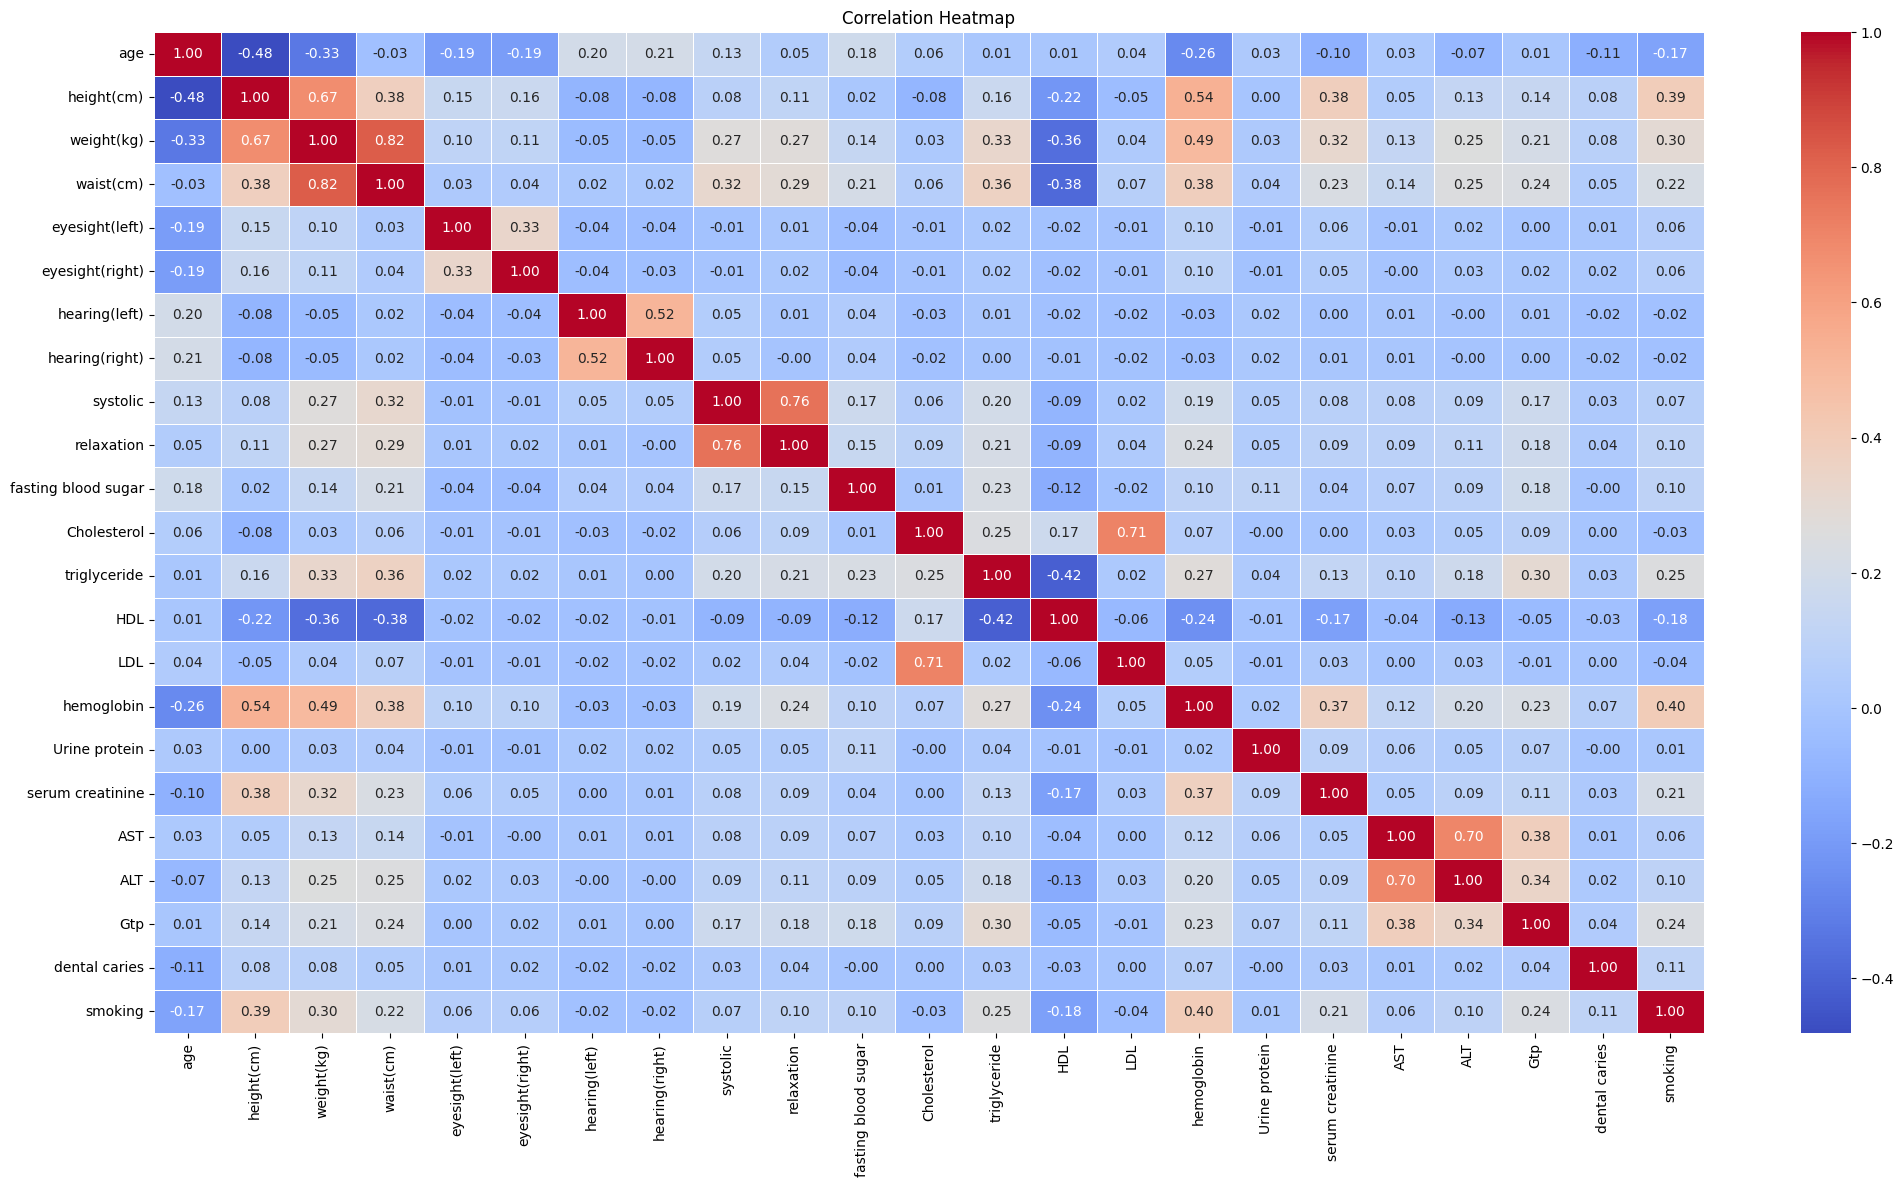

In [9]:
# Calculate the correlation matrix
correlation_matrix = copied_train_df.corr()
 
# Plot the heatmap
plt.figure(figsize=(25, 13))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
 
#Save the image below
plt.savefig("Correlation Heatmap.png",dpi = 300,bbox_inches ="tight")

plt.show();

##### Histogram - 

Plotting histograms on all columns in a pandas DataFrame allows for a quick visual inspection of the distribution of data within each feature, aiding in understanding the range, spread, and potential skewness of the data.

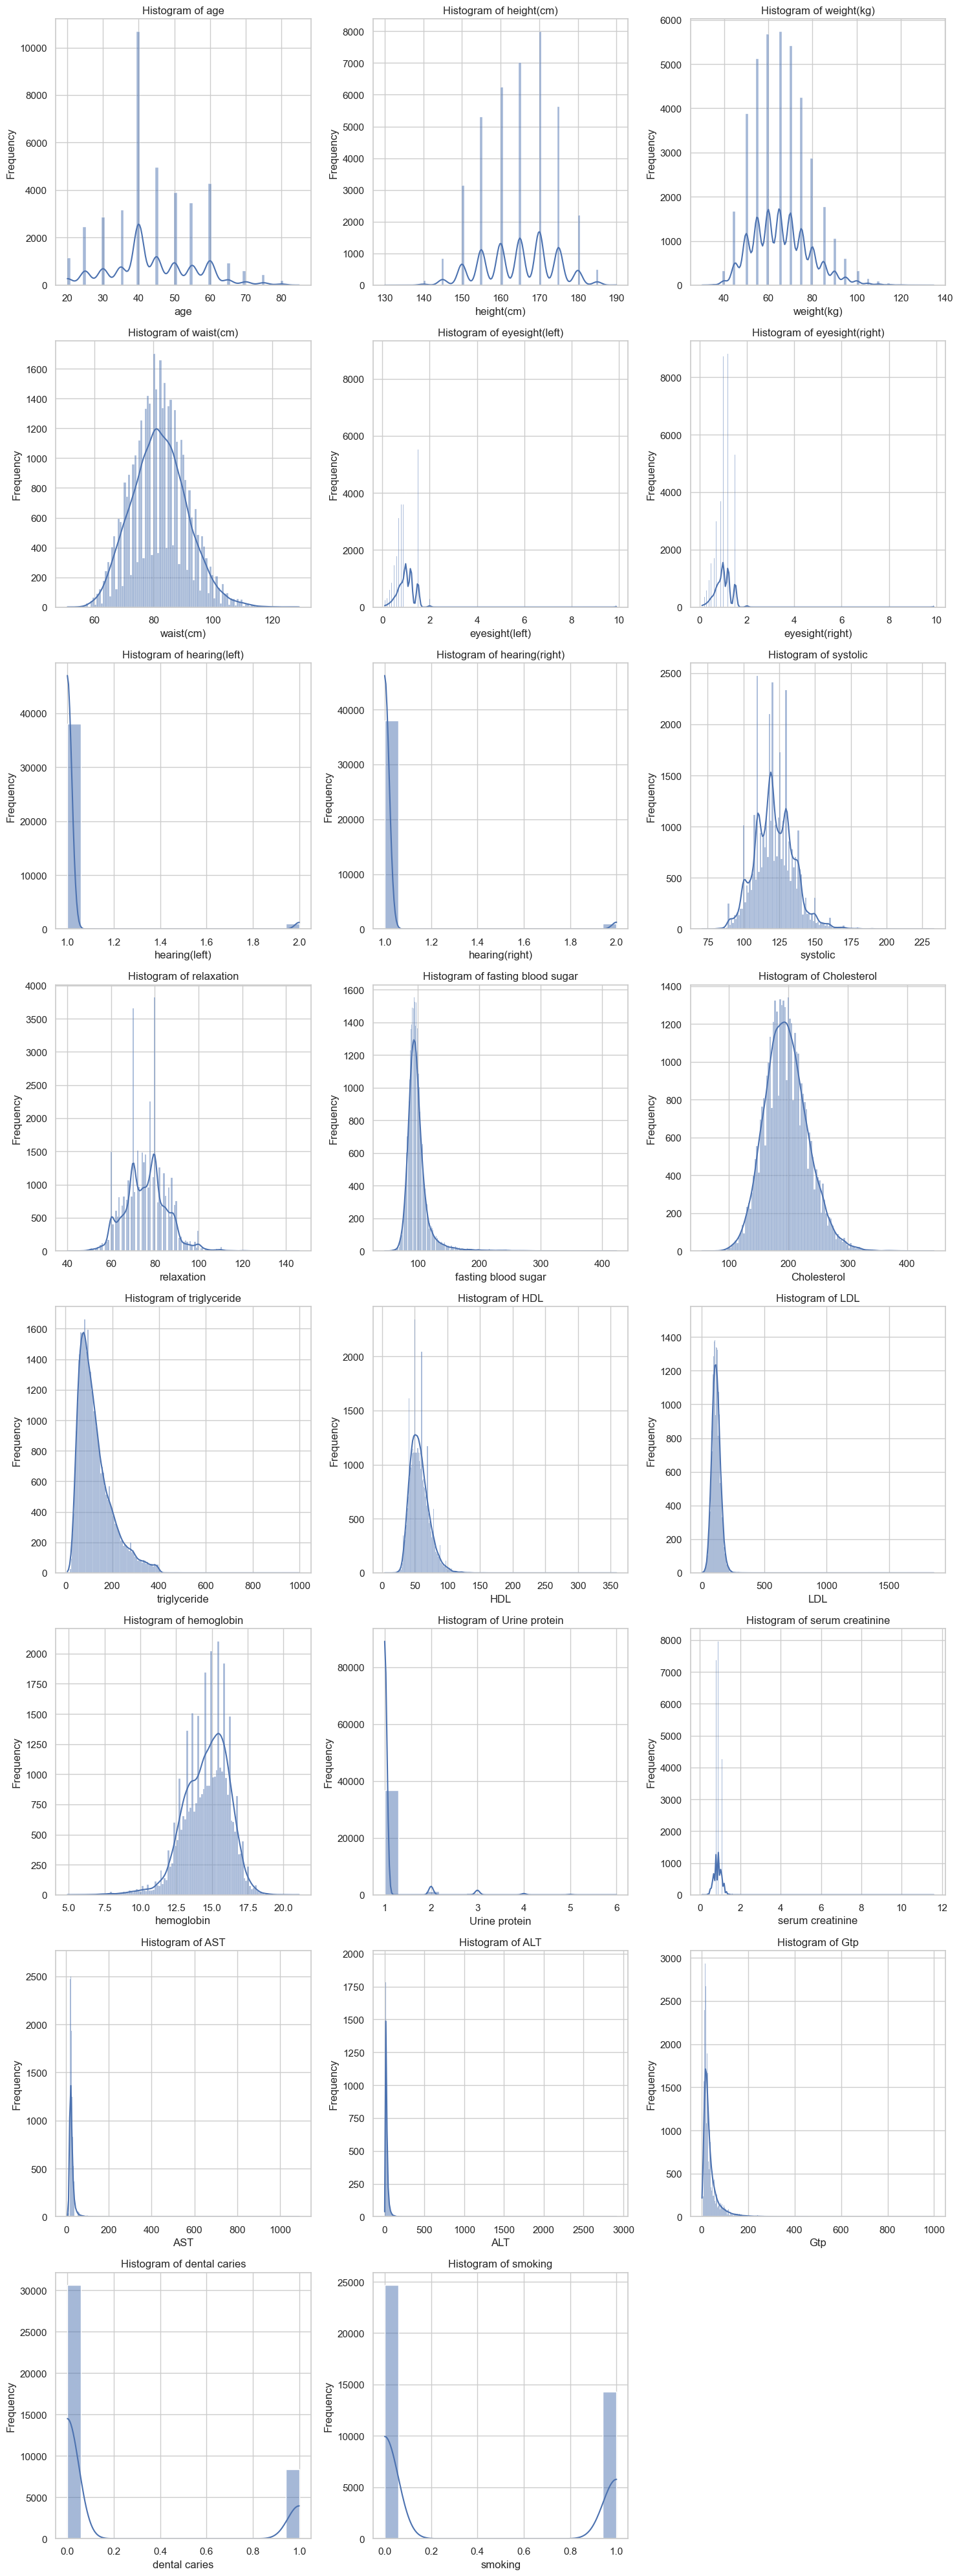

In [10]:
# Set the style
sns.set(style='whitegrid')

# Step 2: Select numeric columns
numeric_columns = copied_train_df.select_dtypes(include=['number']).columns

# Calculate the number of rows and columns for subplots
num_rows = len(numeric_columns) // 3 + (1 if len(numeric_columns) % 3 > 0 else 0)
num_cols = min(3, len(numeric_columns))

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5 * num_rows))

# Flatten the axes array for easier indexing
axes = axes.flatten()


# Plot histograms for each column
for i, column in enumerate(copied_train_df.columns):
    sns.histplot(copied_train_df[column], ax=axes[i], kde=True)
    axes[i].set_title('Histogram of {}'.format(column))
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Frequency')

# Hide empty subplots
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

##### Pie Chart of target from training dataset

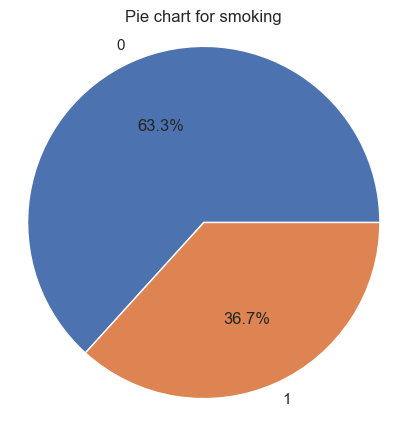

In [11]:
column_to_plot = 'smoking'

# Get the data for the selected column
column_data = copied_train_df[column_to_plot]

# Plot a pie chart
plt.figure(figsize=(5, 5))  # Adjust the figure size if needed
plt.pie(column_data.value_counts(), labels=column_data.value_counts().index, autopct='%1.1f%%')
plt.title(f'Pie chart for {column_to_plot}')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

#Save the image below
plt.savefig("Training - Pie chart (Target).png",dpi = 300,bbox_inches ="tight")

plt.show()

### Defining X and y 

In this section, I divided the dataset into X and y. As per standard, when building a machine learning model, one of the initial steps is to divide the dataset into two main components: the feature matrix (often denoted as X) and the target variable (often denoted as y).

In [12]:
X = copied_train_df.drop('smoking', axis = 1)
y = copied_train_df['smoking']

## Standardize X

Standardization, or feature scaling, is crucial before fitting data into machine learning models because it ensures that all features contribute equally to the model training process, preventing features with larger scales from dominating those with smaller scales.

In [13]:
scaler = StandardScaler()

# Fit and transform the DataFrame
scaled_data_X = scaler.fit_transform(X)

# Convert the scaled data back to a DataFrame
scaled_df_X = pd.DataFrame(scaled_data_X, columns=X.columns)

In [14]:
scaled_df_X.head()

,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,relaxation,...,triglyceride,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries
0,-0.756634,0.578022,1.478029,1.601630,-0.230592,-0.220264,-0.161337,-0.163996,-0.254749,0.207648,...,0.365595,0.869282,0.627725,3.303997,-0.215176,0.516592,1.814922,2.806007,1.712406,1.914084
1,-2.000064,1.122246,3.416553,2.995481,-0.631779,-0.220264,-0.161337,-0.163996,-0.181453,0.311183,...,0.017416,0.937693,-0.025220,0.814382,-0.215176,0.969863,-0.375390,-0.068515,-0.199324,1.914084
2,0.072319,-1.054651,-0.072789,0.422217,-0.230592,-0.220264,-0.161337,-0.163996,-0.841116,0.414717,...,-0.094001,-0.020054,-0.071859,-0.590016,4.758690,-1.296491,55.477568,43.847807,4.751051,-0.522443
3,0.072319,0.033798,1.090325,1.279972,-0.431185,-0.625281,-0.161337,-0.163996,2.677083,1.242994,...,3.332077,-0.772570,-0.561568,1.452745,-0.215176,0.063321,0.302564,0.282815,-0.078583,-0.522443
4,-2.000064,0.033798,-0.460494,-0.113879,0.972969,-1.840332,-0.161337,-0.163996,-0.914411,-1.241836,...,1.020171,-0.704159,-0.538248,0.176020,-0.215176,1.423134,-0.010338,0.027302,-0.501176,-0.522443


### Statistical Analysis of the Scaled Dataset

In this section, I perform a statistical analysis using the describe() function on the scaled X. This is a crucial step in understanding the characteristics and properties of the scaled dataset.

In [15]:
scaled_df_X.describe()

,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,relaxation,...,triglyceride,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries
count,3.898400e+04,3.898400e+04,3.898400e+04,3.898400e+04,3.898400e+04,3.898400e+04,3.898400e+04,3.898400e+04,3.898400e+04,3.898400e+04,...,3.898400e+04,3.898400e+04,3.898400e+04,3.898400e+04,3.898400e+04,3.898400e+04,3.898400e+04,3.898400e+04,3.898400e+04,3.898400e+04
mean,5.012294e-18,4.501951e-16,-4.627714e-16,-5.241948e-16,1.534673e-16,4.224908e-16,3.346389e-16,-5.108894e-16,2.908042e-16,6.110442e-16,...,7.582233e-17,-1.388861e-16,9.842322e-18,-6.324603e-16,1.975755e-16,1.999449e-16,1.672283e-17,-5.176332e-17,2.533487e-17,-1.166497e-17
std,1.000013e+00,1.000013e+00,1.000013e+00,1.000013e+00,1.000013e+00,1.000013e+00,1.000013e+00,1.000013e+00,1.000013e+00,1.000013e+00,...,1.000013e+00,1.000013e+00,1.000013e+00,1.000013e+00,1.000013e+00,1.000013e+00,1.000013e+00,1.000013e+00,1.000013e+00,1.000013e+00
min,-2.000064e+00,-3.775772e+00,-2.786722e+00,-3.330459e+00,-1.835339e+00,-1.840332e+00,-1.613374e-01,-1.639958e-01,-3.699652e+00,-3.726665e+00,...,-1.653841e+00,-3.645812e+00,-2.660320e+00,-6.207608e+00,-2.151761e-01,-3.562846e+00,-1.053344e+00,-8.350549e-01,-7.627811e-01,-5.224432e-01
25%,-3.421579e-01,-5.104266e-01,-8.481984e-01,-6.499758e-01,-4.311853e-01,-4.227724e-01,-1.613374e-01,-1.639958e-01,-6.945240e-01,-6.206284e-01,...,-7.346494e-01,-7.041595e-01,-5.615678e-01,-6.538518e-01,-2.151761e-01,-3.899497e-01,-3.753900e-01,-3.879069e-01,-4.609290e-01,-5.224432e-01
50%,-3.421579e-01,3.379763e-02,-7.278910e-02,-6.659952e-03,-2.999845e-02,-1.775534e-02,-1.613374e-01,-1.639958e-01,-1.081576e-01,5.789692e-04,...,-2.611265e-01,-1.568753e-01,-4.853937e-02,1.121834e-01,-2.151761e-01,6.332119e-02,-1.667889e-01,-1.962720e-01,-2.798177e-01,-5.224432e-01
75%,9.012717e-01,5.780219e-01,7.026202e-01,6.366559e-01,3.711884e-01,3.872617e-01,-1.613374e-01,-1.639958e-01,6.248005e-01,6.217863e-01,...,4.630851e-01,5.956404e-01,4.878085e-01,7.505462e-01,-2.151761e-01,5.165920e-01,1.461128e-01,1.231194e-01,8.240487e-02,-5.224432e-01
max,3.388131e+00,2.754919e+00,5.355076e+00,5.032648e+00,1.782282e+01,1.800550e+01,6.198193e+00,6.097719e+00,8.174268e+00,7.247998e+00,...,1.214796e+01,2.063992e+01,4.069058e+01,4.133869e+00,1.221949e+01,4.856330e+01,5.547757e+01,9.220367e+01,1.930032e+01,1.914084e+00


#### Define Function to Evaluate the performance of the model

In this part, I created a function that helps me quickly check how well my model works. I'll be trying out three different methods - Logistic Regression, RandomforestRegressor, XGBClassifier, and LGBMClassifier - to see which one works best for this project. Using this function saves me time because I won't have to write the same code multiple times.

In [16]:
# Define functions
def evaluate_preds(y_true,y_preds):
    '''
    Perform evaluation comparison on y_true labels ves y_pred labels on a classification
    '''
    accuracy = accuracy_score(y_true,y_preds) 
    precision = precision_score(y_true,y_preds)
    recall = recall_score(y_true,y_preds)
    f1 =f1_score(y_true,y_preds)
    metric_dict = {'accuracy':round(accuracy,2),
                  "precision":round(precision,2),
                  "recall":round(recall,2),
                  "f1":round(f1,2)}
    print(f"Accuracy:{accuracy * 100:.2f}%")
    print(f"Precision:{precision:.2f}")
    print(f"Recall:{recall:.2f}")
    print(f"F1 Score: {f1:.2f}")
    return metric_dict

#### LogisticRegression

Logistic regression is a statistical method used for binary classification, estimating the probability that an instance belongs to a particular class based on its features, by fitting a logistic function to the data.

In [17]:
np.random.seed(42)
 
#split data into test and train
X_train, X_test, y_train, y_test = train_test_split(scaled_df_X, y, test_size=0.2)
 
#Define model
Lr_model = LogisticRegression()
 
#Fit model
Lr_model.fit(X_train, y_train)

LogisticRegression()

##### Evaluate Logistic Regression

In [18]:
y_pred = Lr_model.predict(X_test)

LR_Nor = evaluate_preds(y_test,y_pred)

Accuracy:72.63%
Precision:0.63
Recall:0.58
F1 Score: 0.60


##### Visualize Using Confusion Matrix

In [19]:
confusion_matrix(y_test, y_pred)

array([[4040,  935],
       [1199, 1623]], dtype=int64)

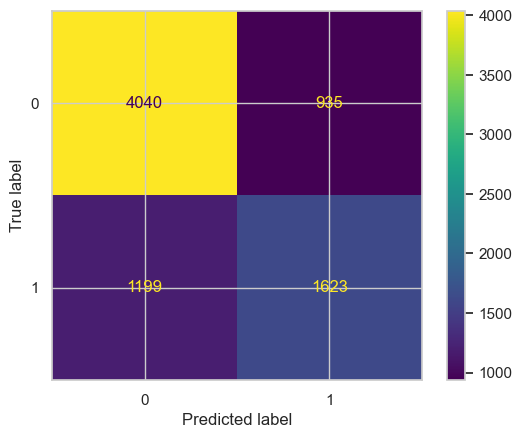

In [20]:
ConfusionMatrixDisplay.from_estimator(estimator = Lr_model, X = X_test, y = y_test);

#### RandomForestClassifier

RandomForestClassifier is an ensemble learning method that fits multiple decision tree classifiers on various sub-samples of the dataset and aggregates their predictions to improve accuracy and robustness.

In [21]:
np.random.seed(42)
 
#Define model
Rf_model = RandomForestClassifier()
 
#Fit model
Rf_model.fit(X_train, y_train)

RandomForestClassifier()

##### Evaluate Random Forest Classifier

In [22]:
y_pred2 = Rf_model.predict(X_test)

Rf_Nor = evaluate_preds(y_test,y_pred2)

Accuracy:80.25%
Precision:0.72
Recall:0.73
F1 Score: 0.73


##### Visualize Using Confusion Matrix

In [23]:
confusion_matrix(y_test, y_pred2)

array([[4191,  784],
       [ 756, 2066]], dtype=int64)

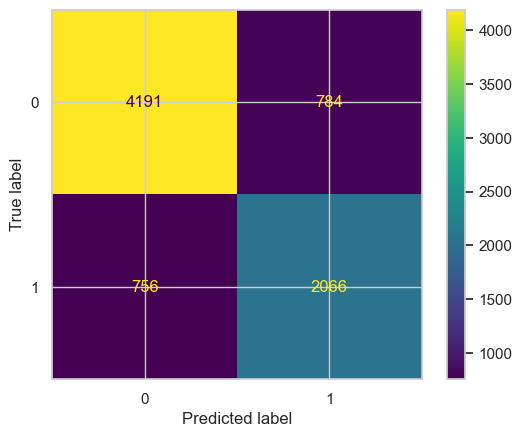

In [24]:
ConfusionMatrixDisplay.from_estimator(estimator = Rf_model, X = X_test, y = y_test);

#### XGBClassifier

XGBClassifier is a gradient boosting algorithm implementation based on the XGBoost library, designed for classification tasks, known for its efficiency, scalability, and high performance in handling structured/tabular data.

In [25]:
np.random.seed(42)
 
#Define model
Xgb_model = XGBClassifier()
 
#Fit model
Xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

##### Evaluate XGBClassifier

In [26]:
y_pred3 = Xgb_model.predict(X_test)

Xgb_Nor = evaluate_preds(y_test,y_pred3)

Accuracy:77.18%
Precision:0.68
Recall:0.71
F1 Score: 0.69


##### Visualize Using Confusion Matrix

In [27]:
confusion_matrix(y_test, y_pred3)

array([[4026,  949],
       [ 830, 1992]], dtype=int64)

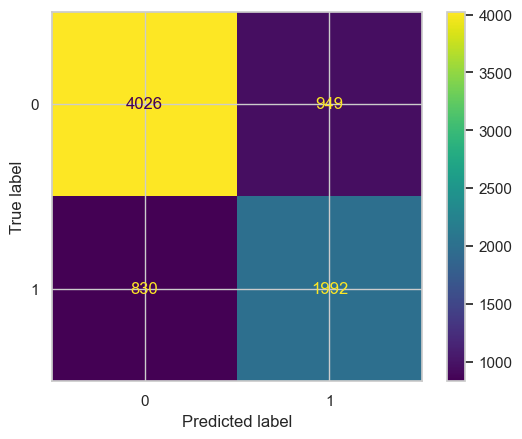

In [28]:
ConfusionMatrixDisplay.from_estimator(estimator = Xgb_model, X = X_test, y = y_test);

#### LGBMClassifier

LGBMClassifier is a gradient boosting framework based on decision tree algorithms, optimized for speed and performance, particularly well-suited for large-scale datasets.

In [29]:
np.random.seed(42)
 
#Define model
Lgb_model = LGBMClassifier()
 
#Fit model
Lgb_model.fit(X_train, y_train)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 11496, number of negative: 19691
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003178 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2333
[LightGBM] [Info] Number of data points in the train set: 31187, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.368615 -> initscore=-0.538163
[LightGBM] [Info] Start training from score -0.538163


LGBMClassifier()

##### Evaluate LGBMClassifier

In [30]:
y_pred4 = Lgb_model.predict(X_test)

Lgb_Nor = evaluate_preds(y_test,y_pred4)

Accuracy:76.64%
Precision:0.67
Recall:0.70
F1 Score: 0.68


##### Visualize Using Confusion Matrix

In [31]:
confusion_matrix(y_test, y_pred4)

array([[4007,  968],
       [ 853, 1969]], dtype=int64)

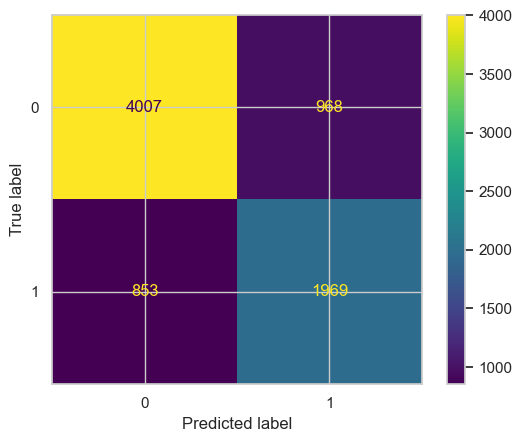

In [32]:
ConfusionMatrixDisplay.from_estimator(estimator = Lgb_model, X = X_test, y = y_test);

### Hyperparameter tuning

Hyperparameter tuning in machine learning involves adjusting the settings that govern a model's learning process to enhance its performance. Despite achieving high accuracy scores for Logistic Regression, Random Forest Classifier, XGBClassifier, and LGBMClassifier models, their confusion matrices reveal a common issue: a tendency to incorrectly classify loan applicants as non-applicants due to being too eager to label people as such. To address this, hyperparameter tuning will be introduced using Randomized Search and Grid Search (Depending on which gives the best results). Random Search explores hyperparameter combinations randomly, striking a balance between exploration and exploitation, while Grid Search systematically evaluates predefined combinations. By tuning hyperparameters, such as regularization strength or the number of neighbors, the aim is to refine the models' behavior and reduce misclassifications, ultimately improving their effectiveness in identifying loan applicants accurately.

#### Tuned Logistic Regression

In [33]:
grid ={
     'penalty': ['l1', 'l2', 'elasticnet'],
     'C': [0.01, 0.1, 1, 10, 100],
     'solver': ['lbfgs', 'newton-cg', 'liblinear']
 }

np.random.seed(42)

# Define model
LR_model_2 = LogisticRegression(n_jobs = -1)

# Setup RandomizedSearchCV
gs_LR_model_2 = GridSearchCV(estimator = LR_model_2,
                           param_grid = grid,
                           #n_iter = 10, #The number of models t try
                           cv = 5,
                           verbose = 2)
#Fit Randomized model
gs_LR_model_2.fit(X_train, y_train);

Fitting 5 folds for each of 45 candidates, totalling 225 fits
[CV] END ...................C=0.01, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ...................C=0.01, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ...................C=0.01, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ...................C=0.01, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ...................C=0.01, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ...............C=0.01, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ...............C=0.01, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ...............C=0.01, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ...............C=0.01, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ...............C=0.01, penalty=l1, solver=newton-cg; total time=   0.0s


C:\Users\omoto\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:1216: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 16.
  warnings.warn(
C:\Users\omoto\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:1216: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 16.
  warnings.warn(
C:\Users\omoto\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:1216: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 16.
  warnings.warn(
C:\Users\omoto\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:1216: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 16.
  warnings.warn(


[CV] END ...............C=0.01, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ...............C=0.01, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ...............C=0.01, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ...............C=0.01, penalty=l1, solver=liblinear; total time=   0.0s


C:\Users\omoto\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:1216: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 16.
  warnings.warn(


[CV] END ...............C=0.01, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ...................C=0.01, penalty=l2, solver=lbfgs; total time=   2.3s
[CV] END ...................C=0.01, penalty=l2, solver=lbfgs; total time=   0.9s
[CV] END ...................C=0.01, penalty=l2, solver=lbfgs; total time=   0.9s
[CV] END ...................C=0.01, penalty=l2, solver=lbfgs; total time=   1.0s
[CV] END ...................C=0.01, penalty=l2, solver=lbfgs; total time=   1.0s
[CV] END ...............C=0.01, penalty=l2, solver=newton-cg; total time=   0.8s
[CV] END ...............C=0.01, penalty=l2, solver=newton-cg; total time=   0.8s
[CV] END ...............C=0.01, penalty=l2, solver=newton-cg; total time=   0.8s
[CV] END ...............C=0.01, penalty=l2, solver=newton-cg; total time=   0.7s
[CV] END ...............C=0.01, penalty=l2, solver=newton-cg; total time=   0.7s
[CV] END ...............C=0.01, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ...............C=0.

C:\Users\omoto\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:1216: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 16.
  warnings.warn(
C:\Users\omoto\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:1216: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 16.
  warnings.warn(
C:\Users\omoto\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:1216: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 16.
  warnings.warn(


[CV] END ...............C=0.01, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ...............C=0.01, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ...............C=0.01, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ...........C=0.01, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END ...........C=0.01, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END ...........C=0.01, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END ...........C=0.01, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END ...........C=0.01, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END .......C=0.01, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END .......C=0.01, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END .......C=0.01, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END .......C=0.01, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END .......C=0.01, pena

C:\Users\omoto\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:1216: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 16.
  warnings.warn(
C:\Users\omoto\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:1216: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 16.
  warnings.warn(


[CV] END .......C=0.01, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END .......C=0.01, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END ....................C=0.1, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ....................C=0.1, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ....................C=0.1, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ....................C=0.1, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ....................C=0.1, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ................C=0.1, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ................C=0.1, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ................C=0.1, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ................C=0.1, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ................C=0.1, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ................C=0

C:\Users\omoto\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:1216: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 16.
  warnings.warn(
C:\Users\omoto\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:1216: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 16.
  warnings.warn(


[CV] END ................C=0.1, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ................C=0.1, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ................C=0.1, penalty=l1, solver=liblinear; total time=   0.0s


C:\Users\omoto\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:1216: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 16.
  warnings.warn(
C:\Users\omoto\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:1216: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 16.
  warnings.warn(
C:\Users\omoto\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:1216: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 16.
  warnings.warn(


[CV] END ................C=0.1, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ....................C=0.1, penalty=l2, solver=lbfgs; total time=   0.9s
[CV] END ....................C=0.1, penalty=l2, solver=lbfgs; total time=   0.9s
[CV] END ....................C=0.1, penalty=l2, solver=lbfgs; total time=   1.0s
[CV] END ....................C=0.1, penalty=l2, solver=lbfgs; total time=   0.9s
[CV] END ....................C=0.1, penalty=l2, solver=lbfgs; total time=   0.8s
[CV] END ................C=0.1, penalty=l2, solver=newton-cg; total time=   0.6s
[CV] END ................C=0.1, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ................C=0.1, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ................C=0.1, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ................C=0.1, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ................C=0.1, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ................C=0

C:\Users\omoto\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:1216: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 16.
  warnings.warn(
C:\Users\omoto\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:1216: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 16.
  warnings.warn(
C:\Users\omoto\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:1216: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 16.
  warnings.warn(
C:\Users\omoto\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:1216: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 16.
  warnings.warn(


[CV] END ................C=0.1, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ................C=0.1, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ............C=0.1, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END ............C=0.1, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END ............C=0.1, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END ............C=0.1, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END ............C=0.1, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END ........C=0.1, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END ........C=0.1, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END ........C=0.1, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END ........C=0.1, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END ........C=0.1, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END ........C=0.1, pena

C:\Users\omoto\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:1216: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 16.
  warnings.warn(
C:\Users\omoto\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:1216: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 16.
  warnings.warn(


[CV] END ..................C=1, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ..................C=1, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ..................C=1, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ..................C=1, penalty=l1, solver=liblinear; total time=   0.0s


C:\Users\omoto\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:1216: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 16.
  warnings.warn(
C:\Users\omoto\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:1216: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 16.
  warnings.warn(
C:\Users\omoto\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:1216: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 16.
  warnings.warn(
C:\Users\omoto\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:1216: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 16.
  warnings.warn(


[CV] END ..................C=1, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ......................C=1, penalty=l2, solver=lbfgs; total time=   1.0s
[CV] END ......................C=1, penalty=l2, solver=lbfgs; total time=   1.0s
[CV] END ......................C=1, penalty=l2, solver=lbfgs; total time=   1.0s
[CV] END ......................C=1, penalty=l2, solver=lbfgs; total time=   1.0s
[CV] END ......................C=1, penalty=l2, solver=lbfgs; total time=   1.0s
[CV] END ..................C=1, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ..................C=1, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ..................C=1, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ..................C=1, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ..................C=1, penalty=l2, solver=newton-cg; total time=   0.1s


C:\Users\omoto\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:1216: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 16.
  warnings.warn(
C:\Users\omoto\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:1216: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 16.
  warnings.warn(
C:\Users\omoto\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:1216: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 16.
  warnings.warn(


[CV] END ..................C=1, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ..................C=1, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ..................C=1, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ..................C=1, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ..................C=1, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ..............C=1, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END ..............C=1, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END ..............C=1, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END ..............C=1, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END ..............C=1, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END ..........C=1, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END ..........C=1, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END ..........C=1, pena

C:\Users\omoto\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:1216: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 16.
  warnings.warn(
C:\Users\omoto\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:1216: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 16.
  warnings.warn(


[CV] END ..........C=1, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END ..........C=1, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END ..........C=1, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END ..........C=1, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END ..........C=1, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END .....................C=10, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END .....................C=10, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END .....................C=10, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END .....................C=10, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END .....................C=10, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END .................C=10, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END .................C=10, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END .................C=

C:\Users\omoto\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:1216: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 16.
  warnings.warn(
C:\Users\omoto\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:1216: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 16.
  warnings.warn(


[CV] END .................C=10, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END .................C=10, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END .................C=10, penalty=l1, solver=liblinear; total time=   0.0s


C:\Users\omoto\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:1216: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 16.
  warnings.warn(
C:\Users\omoto\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:1216: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 16.
  warnings.warn(
C:\Users\omoto\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:1216: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 16.
  warnings.warn(


[CV] END .................C=10, penalty=l1, solver=liblinear; total time=   0.1s
[CV] END .....................C=10, penalty=l2, solver=lbfgs; total time=   1.0s
[CV] END .....................C=10, penalty=l2, solver=lbfgs; total time=   1.0s
[CV] END .....................C=10, penalty=l2, solver=lbfgs; total time=   1.0s
[CV] END .....................C=10, penalty=l2, solver=lbfgs; total time=   1.0s
[CV] END .....................C=10, penalty=l2, solver=lbfgs; total time=   1.0s
[CV] END .................C=10, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END .................C=10, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END .................C=10, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END .................C=10, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END .................C=10, penalty=l2, solver=newton-cg; total time=   0.1s


C:\Users\omoto\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:1216: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 16.
  warnings.warn(
C:\Users\omoto\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:1216: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 16.
  warnings.warn(
C:\Users\omoto\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:1216: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 16.
  warnings.warn(
C:\Users\omoto\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:1216: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 16.
  warnings.warn(


[CV] END .................C=10, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END .................C=10, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END .................C=10, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END .................C=10, penalty=l2, solver=liblinear; total time=   0.0s


C:\Users\omoto\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:1216: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 16.
  warnings.warn(
C:\Users\omoto\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:1216: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 16.
  warnings.warn(


[CV] END .................C=10, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END .............C=10, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END .............C=10, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END .............C=10, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END .............C=10, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END .............C=10, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END .........C=10, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END .........C=10, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END .........C=10, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END .........C=10, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END .........C=10, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END .........C=10, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END .........C=10, pena

C:\Users\omoto\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:1216: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 16.
  warnings.warn(
C:\Users\omoto\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:1216: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 16.
  warnings.warn(
C:\Users\omoto\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:1216: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 16.
  warnings.warn(
C:\Users\omoto\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:1216: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 16.
  warnings.warn(


[CV] END ................C=100, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ................C=100, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ................C=100, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ................C=100, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ....................C=100, penalty=l2, solver=lbfgs; total time=   1.0s
[CV] END ....................C=100, penalty=l2, solver=lbfgs; total time=   1.0s
[CV] END ....................C=100, penalty=l2, solver=lbfgs; total time=   1.0s
[CV] END ....................C=100, penalty=l2, solver=lbfgs; total time=   1.0s
[CV] END ....................C=100, penalty=l2, solver=lbfgs; total time=   1.0s
[CV] END ................C=100, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ................C=100, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ................C=100, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ................C=1

C:\Users\omoto\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:1216: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 16.
  warnings.warn(
C:\Users\omoto\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:1216: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 16.
  warnings.warn(
C:\Users\omoto\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:1216: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 16.
  warnings.warn(


[CV] END ................C=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ................C=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ................C=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ................C=100, penalty=l2, solver=liblinear; total time=   0.0s


C:\Users\omoto\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:1216: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 16.
  warnings.warn(
C:\Users\omoto\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:1216: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 16.
  warnings.warn(
C:\Users\omoto\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
125 fits failed out of a total of 225.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback

[CV] END ................C=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ............C=100, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END ............C=100, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END ............C=100, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END ............C=100, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END ............C=100, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END ........C=100, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END ........C=100, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END ........C=100, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END ........C=100, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END ........C=100, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END ........C=100, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END ........C=100, pena

C:\Users\omoto\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_search.py:1051: UserWarning: One or more of the test scores are non-finite: [       nan        nan 0.71927359 0.72164644 0.72164644 0.72174268
        nan        nan        nan        nan        nan 0.72257639
 0.72241609 0.72251228 0.72238402        nan        nan        nan
        nan        nan 0.72238401 0.72231988 0.72251227 0.72244814
        nan        nan        nan        nan        nan 0.72238402
 0.72228782 0.72248021 0.72248021        nan        nan        nan
        nan        nan 0.72248021 0.72228782 0.72248021 0.72248021
        nan        nan        nan]
  warnings.warn(
C:\Users\omoto\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:1216: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 16.
  warnings.warn(


In [34]:
# To see the best parameter combination
gs_LR_model_2.best_params_

{'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}

##### Evaluate tuned model

In [35]:
# To predict with the best hyperparameter
y_pred5 = gs_LR_model_2.predict(X_test)

LR_gs = evaluate_preds(y_test, y_pred5)

Accuracy:72.60%
Precision:0.63
Recall:0.58
F1 Score: 0.60


##### Visualize tuned model using confusion matrix

In [36]:
# To see the confusion matrix of the predictions vs the actual
confusion_matrix(y_test, y_pred5)

array([[4034,  941],
       [1195, 1627]], dtype=int64)

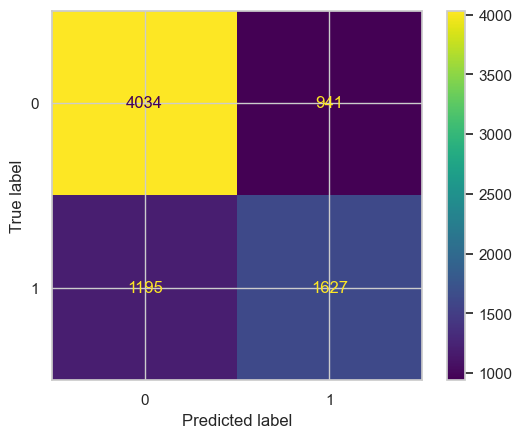

In [37]:
ConfusionMatrixDisplay.from_estimator(estimator = gs_LR_model_2, X = X_test, y = y_test);

#### Tuned Randon Forest Classifier

##### Tuned with RandomizedSearch

Tuning using RandomizedSearch involves randomly sampling from a defined search space of hyperparameters to efficiently explore a wide range of values and find optimal parameters for a machine learning model.

In [38]:
grid = {
    'n_estimators': [50, 100, 200, 300],
    'max_features': ['auto', 'sqrt', 'log2', None],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}
 
np.random.seed(42)
 
# Instantiate RandomForestClassifier
Rf_model_2 = RandomForestClassifier(n_jobs=1)
 
# Setup RandomizedSearchCV
rs_Rf_model_2 = RandomizedSearchCV(estimator=Rf_model_2,
                            param_distributions=grid, 
                            n_iter=10, # number of models to try
                            cv=5,
                            verbose=2)
 
# Fit the RandomizedSearchCV version 
rs_Rf_model_2.fit(X_train, y_train);

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END bootstrap=False, max_depth=10, max_features=None, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=  29.8s
[CV] END bootstrap=False, max_depth=10, max_features=None, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=  33.1s
[CV] END bootstrap=False, max_depth=10, max_features=None, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=  30.1s
[CV] END bootstrap=False, max_depth=10, max_features=None, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=  26.4s
[CV] END bootstrap=False, max_depth=10, max_features=None, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=  25.7s
[CV] END bootstrap=False, max_depth=40, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=300; total time=   0.0s
[CV] END bootstrap=False, max_depth=40, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators

C:\Users\omoto\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
5 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\omoto\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\omoto\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py", line 1467, in wrapper
    estimator._validate_params()
  File "C:\Users\omoto\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py",

In [39]:
# To see the best parameter combination
rs_Rf_model_2.best_params_

{'n_estimators': 200,
 'min_samples_split': 5,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 50,
 'bootstrap': False}

##### Evaluate tuned model

In [40]:
# To predict with the best hyperparameter
y_pred6 = rs_Rf_model_2.predict(X_test)

Rf_rs = evaluate_preds(y_test, y_pred6)

Accuracy:80.26%
Precision:0.72
Recall:0.74
F1 Score: 0.73


##### Visualize tuned model using confusion matrix

In [41]:
# To see the confusion matrix of the predictions vs the actual
confusion_matrix(y_test, y_pred6)

array([[4162,  813],
       [ 726, 2096]], dtype=int64)

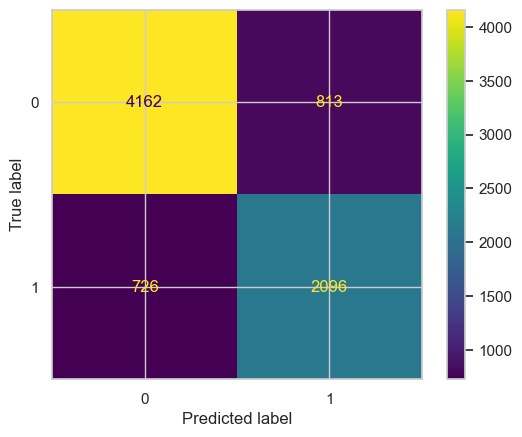

In [42]:
ConfusionMatrixDisplay.from_estimator(estimator = rs_Rf_model_2, X = X_test, y = y_test);

##### Tuned with GridSearch

Tuning using GridSearch involves exhaustively searching through a specified parameter grid to find the optimal combination of hyperparameters for a machine learning model.

In [43]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_features': ['auto','sqrt'],
    'max_depth': [10, 20, 30],
    'min_samples_split': [6, 10],
    'min_samples_leaf': [2, 4],
    'bootstrap': [True, False]}
 
np.random.seed(42)
 
# Define model
Rf_model_3 = RandomForestClassifier(n_jobs = -1)
 
# Setup GridSearchCV
gs_Rf_model_3 = GridSearchCV(estimator = Rf_model_3,
                           param_grid = param_grid,
                           #n_iter = 10, #The number of models t try
                           cv = 5,
                           verbose = 2)
#Fit GridSearch model
gs_Rf_model_3.fit(X_train, y_train);

Fitting 5 folds for each of 144 candidates, totalling 720 fits
[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=200; total time=   0.0s
[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=200; tota

C:\Users\omoto\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
360 fits failed out of a total of 720.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
360 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\omoto\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\omoto\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py", line 1467, in wrapper
    estimator._validate_params()
  File "C:\Users\omoto\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base

In [44]:
# To see the best parameter combination
gs_Rf_model_3.best_params_

{'bootstrap': False,
 'max_depth': 30,
 'max_features': 'sqrt',
 'min_samples_leaf': 2,
 'min_samples_split': 6,
 'n_estimators': 200}

##### Evaluate tuned model

In [45]:
# To predict with the best hyperparameter
y_pred7 = gs_Rf_model_3.predict(X_test)

Rf_gs = evaluate_preds(y_test, y_pred7)

Accuracy:80.72%
Precision:0.73
Recall:0.75
F1 Score: 0.74


##### Visualize tuned model using confusion matrix

In [46]:
# To see the confusion matrix of the predictions vs the actual
confusion_matrix(y_test, y_pred7)

array([[4172,  803],
       [ 700, 2122]], dtype=int64)

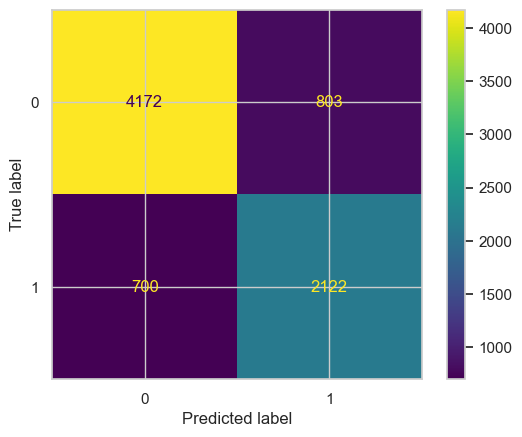

In [47]:
ConfusionMatrixDisplay.from_estimator(estimator = gs_Rf_model_3, X = X_test, y = y_test);

#### Tuned XGBClassifier 

In [48]:
# Define XGBClassifier estimator
estimator = XGBClassifier(objective='binary:logistic', nthread=4, seed=42)

# Define parameters grid
parameters = {
    'max_depth': range(2, 10, 1),
    'n_estimators': range(60, 220, 40),
    'learning_rate': [0.1, 0.01, 0.05]
}

# Create GridSearchCV object
gs_Xgb_model_2 = GridSearchCV(
    estimator=estimator,
    param_grid=parameters,
    n_jobs=10,
    cv=10,
    verbose=True
)

# Fit the model
gs_Xgb_model_2.fit(X_train, y_train)

Fitting 10 folds for each of 96 candidates, totalling 960 fits


GridSearchCV(cv=10,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, nthread=4,
                                     num_parallel_tree=None, ...),
             n_jobs=10,
             param_grid={'learning_rate': [0.1, 0.01, 0.05],
                         'max_depth': range(2, 10),
                         'n_estimators': range(60, 220, 40)},
             verbose=True)

In [49]:
# To see the best parameter combination
gs_Xgb_model_2.best_params_

{'learning_rate': 0.1, 'max_depth': 9, 'n_estimators': 180}

##### Evaluate tuned model

In [50]:
# To predict with the best hyperparameter
y_pred8 = gs_Xgb_model_2.predict(X_test)

Xgb_gs = evaluate_preds(y_test, y_pred8)

Accuracy:78.59%
Precision:0.70
Recall:0.72
F1 Score: 0.71


##### Visualize tuned model using confusion matrix

In [51]:
# To see the confusion matrix of the predictions vs the actual
confusion_matrix(y_test, y_pred8)

array([[4086,  889],
       [ 780, 2042]], dtype=int64)

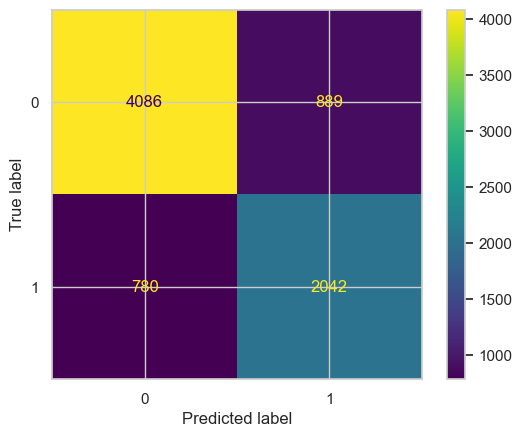

In [52]:
ConfusionMatrixDisplay.from_estimator(estimator = gs_Xgb_model_2, X = X_test, y = y_test);

#### Tuned LGBMClassifier

In [53]:
# Define the parameter grid
param_grid = {
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'num_leaves': [15, 31, 63]
}

# Create the LightGBM classifier
Lgb_model_2 = LGBMClassifier(n_jobs=-1)

# Create the GridSearchCV object
gs_Lgb_model_2 = GridSearchCV(
    estimator=Lgb_model_2,
    param_grid=param_grid,
    cv=5
)

# Fit the model
gs_Lgb_model_2.fit(X_train, y_train)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 9197, number of negative: 15752
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001539 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2286
[LightGBM] [Info] Number of data points in the train set: 24949, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.368632 -> initscore=-0.538090
[LightGBM] [Info] Start training from score -0.538090
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 9196, number of negative: 15753
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001139 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2286
[LightGBM] [Info] Number of data points in the train set: 24949, number of used f

GridSearchCV(cv=5, estimator=LGBMClassifier(n_jobs=-1),
             param_grid={'learning_rate': [0.01, 0.05, 0.1],
                         'max_depth': [3, 5, 7],
                         'n_estimators': [100, 200, 300],
                         'num_leaves': [15, 31, 63]})

In [54]:
# To see the best parameter combination
gs_Lgb_model_2.best_params_

{'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 300, 'num_leaves': 63}

##### Evaluate tuned model

In [55]:
# To predict with the best hyperparameter
y_pred9 = gs_Lgb_model_2.predict(X_test)

Lgb_gs = evaluate_preds(y_test, y_pred9)

Accuracy:77.61%
Precision:0.68
Recall:0.71
F1 Score: 0.70


##### Visualize tuned model using confusion matrix

In [56]:
# To see the confusion matrix of the predictions vs the actual
confusion_matrix(y_test, y_pred9)

array([[4054,  921],
       [ 825, 1997]], dtype=int64)

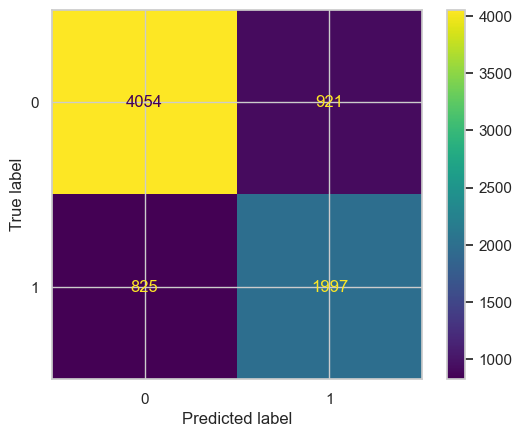

In [57]:
ConfusionMatrixDisplay.from_estimator(estimator = gs_Lgb_model_2, X = X_test, y = y_test);

### Compare the outcomes of our models

compare_matrics = pd.DataFrame({'baseline_LR': LR_Nor,
                                'baseline_RF': Rf_Nor,
                                'baseline_XGB': Xgb_Nor,
                                'baseline_LGBM': Lgb_Nor,
                                'GS_LR': LR_gs,
                                'RS_RF': Rf_rs,
                                'GS_RF': Rf_gs,
                                'GS_XGB': Xgb_gs,
                                'GS_LGBM': Lgb_gs})
compare_matrics

### Conclusion

Based on the above summary of all the results, the model with the highest performance across all metrics appears to be the one trained with grid search and Random Forest algorithm (GS_RF), achieving the highest accuracy, precision, recall, and F1-score compared to other models.

### Save model

In [58]:
#save the best-performing model
pickle.dump(gs_Rf_model_3, open('gride_search_random_forest_classification_model_1.pkl', 'wb'))

### Use best model to predict target for the Testing Dataset

In [59]:
Testing_df.head()

,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,relaxation,...,triglyceride,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries
0,40,170,65,75.1,1.0,0.9,1,1,120,70,...,260,41,132,15.7,1,0.8,24,26,32,0
1,45,170,75,89.0,0.7,1.2,1,1,100,67,...,345,49,140,15.7,1,1.1,26,28,138,0
2,30,180,90,94.0,1.0,0.8,1,1,115,72,...,103,53,103,13.5,1,1.0,19,29,30,0
3,60,170,50,73.0,0.5,0.7,1,1,118,78,...,70,65,108,14.1,1,1.3,31,28,33,0
4,30,170,65,78.0,1.5,1.0,1,1,110,70,...,210,45,103,14.7,1,0.8,21,21,19,0


#### Copy Test Dataset

In [60]:
copied_test_df = Testing_df.copy()

### Standardized testing dataset

In [61]:
scaler = StandardScaler()

# Fit and transform the DataFrame
scaled_data_test = scaler.fit_transform(copied_test_df)

### Predict smoking status for the test dataset

In [62]:
y_pred_test = gs_Rf_model_3.predict(scaled_data_test)

C:\Users\omoto\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [63]:
y_pred_test

array([1, 1, 0, ..., 0, 0, 1], dtype=int64)

In [64]:
copied_test_df['Predict'] = y_pred_test

In [65]:
copied_test_df.head()

,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,relaxation,...,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,Predict
0,40,170,65,75.1,1.0,0.9,1,1,120,70,...,41,132,15.7,1,0.8,24,26,32,0,1
1,45,170,75,89.0,0.7,1.2,1,1,100,67,...,49,140,15.7,1,1.1,26,28,138,0,1
2,30,180,90,94.0,1.0,0.8,1,1,115,72,...,53,103,13.5,1,1.0,19,29,30,0,0
3,60,170,50,73.0,0.5,0.7,1,1,118,78,...,65,108,14.1,1,1.3,31,28,33,0,0
4,30,170,65,78.0,1.5,1.0,1,1,110,70,...,45,103,14.7,1,0.8,21,21,19,0,0


#### Check unique predictions

In [67]:
unique_values = copied_test_df['Predict'].unique()

print(unique_values)

[1 0]


### Pie Chart of the predictions

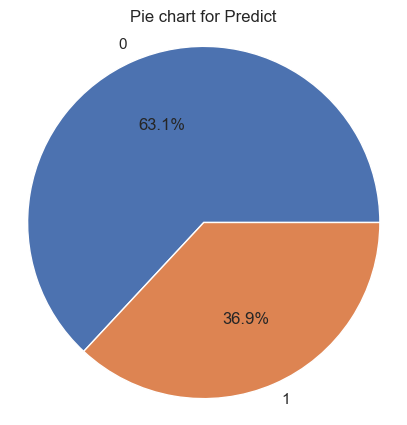

In [69]:
column_to_plot = 'Predict'

# Get the data for the selected column
column_data = copied_test_df[column_to_plot]

# Plot a pie chart
plt.figure(figsize=(5, 5))  # Adjust the figure size if needed
plt.pie(column_data.value_counts(), labels=column_data.value_counts().index, autopct='%1.1f%%')
plt.title(f'Pie chart for {column_to_plot}')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

#Save the image below
plt.savefig("Testing - Pie chart (Predict).png",dpi = 300,bbox_inches ="tight")

plt.show()

### Predict using saved model

In [70]:
# To load a saved model with pickle

loaded_pickle_model = pickle.load(open('gride_search_random_forest_classification_model_1.pkl', 'rb'))

In [71]:
#loaded_pickle_model

In [72]:
# To make prediction with the saved model
pickle_y_preds = loaded_pickle_model.predict(scaled_data_test)

C:\Users\omoto\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [73]:
df = pd.DataFrame(scaled_data_test, columns=Testing_df.columns)

In [74]:
df.head()

,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,relaxation,...,triglyceride,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries
0,-0.356696,0.591112,-0.054814,-0.755146,-0.015665,-0.223390,-0.16369,-0.163497,-0.111814,-0.619836,...,1.873920,-1.084301,0.481488,0.693259,-0.215959,-0.380365,-0.108618,-0.025972,-0.156076,-0.516819
1,0.056912,0.591112,0.736396,0.763934,-0.669993,0.418835,-0.16369,-0.163497,-1.566216,-0.928256,...,3.066787,-0.551600,0.704032,0.693259,-0.215959,0.961229,-0.007448,0.040507,1.895969,-0.516819
2,-1.183912,1.676837,1.923210,1.310366,-0.015665,-0.437465,-0.16369,-0.163497,-0.475414,-0.414223,...,-0.329375,-0.285249,-0.325235,-0.717226,-0.215959,0.514031,-0.361543,0.073747,-0.194794,-0.516819
3,1.297736,0.591112,-1.241628,-0.984647,-1.106211,-0.651540,-0.16369,-0.163497,-0.257254,0.202617,...,-0.792488,0.513802,-0.186145,-0.332549,-0.215959,1.855625,0.245477,0.040507,-0.136717,-0.516819
4,-1.183912,0.591112,-0.054814,-0.438215,1.074881,-0.009315,-0.16369,-0.163497,-0.839015,-0.619836,...,1.172234,-0.817950,-0.325235,0.052129,-0.215959,-0.380365,-0.260373,-0.192171,-0.407742,-0.516819


In [77]:
df['Predict'] = pickle_y_preds

In [78]:
df.head()

,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,relaxation,...,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,Predict
0,-0.356696,0.591112,-0.054814,-0.755146,-0.015665,-0.223390,-0.16369,-0.163497,-0.111814,-0.619836,...,-1.084301,0.481488,0.693259,-0.215959,-0.380365,-0.108618,-0.025972,-0.156076,-0.516819,1
1,0.056912,0.591112,0.736396,0.763934,-0.669993,0.418835,-0.16369,-0.163497,-1.566216,-0.928256,...,-0.551600,0.704032,0.693259,-0.215959,0.961229,-0.007448,0.040507,1.895969,-0.516819,1
2,-1.183912,1.676837,1.923210,1.310366,-0.015665,-0.437465,-0.16369,-0.163497,-0.475414,-0.414223,...,-0.285249,-0.325235,-0.717226,-0.215959,0.514031,-0.361543,0.073747,-0.194794,-0.516819,0
3,1.297736,0.591112,-1.241628,-0.984647,-1.106211,-0.651540,-0.16369,-0.163497,-0.257254,0.202617,...,0.513802,-0.186145,-0.332549,-0.215959,1.855625,0.245477,0.040507,-0.136717,-0.516819,0
4,-1.183912,0.591112,-0.054814,-0.438215,1.074881,-0.009315,-0.16369,-0.163497,-0.839015,-0.619836,...,-0.817950,-0.325235,0.052129,-0.215959,-0.380365,-0.260373,-0.192171,-0.407742,-0.516819,0


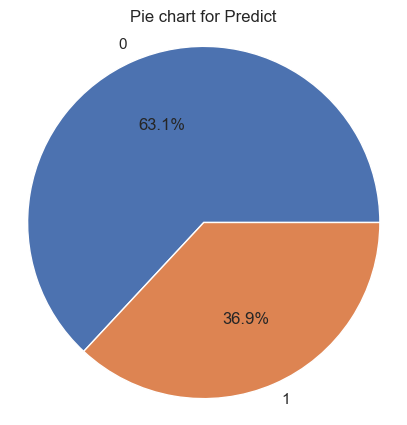

In [79]:
column_to_plot = 'Predict'

# Get the data for the selected column
column_data = df[column_to_plot]

# Plot a pie chart
plt.figure(figsize=(5, 5))  # Adjust the figure size if needed
plt.pie(column_data.value_counts(), labels=column_data.value_counts().index, autopct='%1.1f%%')
plt.title(f'Pie chart for {column_to_plot}')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()